<a href="https://colab.research.google.com/github/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-19/blob/main/Actividad10/Actividad_Semana_9_Equipo19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada
**Curso: Inteligencia Artificial y Aprendizaje Automático**

Tecnológico de Monterrey



Prof Luis Eduardo Falcón Morales

Semana 9 actividad 10: Taxonomía de Métricas de Clasificación



    •	Aurelio Antonio Lozano Rabago A01081266

    •	Josias Ruiz Peña A00968460

    •	David González A01794025

    •	Jerson David Pérez Contreras A01793810

    •	Jose Alberto Mtanous Treviño A00169781


## Ejercicio 1: Comparación experimental del desempeño de métricas para clasificación

Las métricas de desempeño en clasificación son fundamentales para evaluar la calidad de los métodos de aprendizaje y los modelos generados, se analizaron 18 métricas de desempeño con la finalidad de ayudar a elegir la mas adecuada (o mas adecuadas) para cada aplicación.

**Introducción**

La correcta evaluación de modelos de aprendizaje automático es muy importante en temas de reconocimiento de patrones, esta evaluación puede apoyarse en 3 grupos de métricas:

>•	Métricas basadas en un umbral y entendimiento cualitativo del error: Se usan cuando se pretende minimizar el número de errores en un modelo

>•	Métricas basadas en entendimiento probabilístico del error: son útiles especialmente cuando se quiere evaluar la confiabilidad de los clasificadores

>•	Métricas basadas en que tan bien un modelo clasifica los ejemplos: se usan para seleccionar las mejores n instancias de un set de datos para una buena separación de clases.

**Trabajos relacionados.**

Hay varios estudios que muestran que, dependiendo las métricas usadas, se obtienen un mejor modelo. El propósito de este estudio es analizar que familias de algoritmos se comportan mejor según la familia de métricas a usar.

**Métricas**

Algunas ocasiones lo más complicado es entender la diferencia entre una buena 
clasificación y probabilidad.

>•	Umbral del error (cualitativas): Acc, MAvA, MFM, MAvG, KapS

>•	Clasificación (probabilísticas): AUNU, AUNP, AU1U, AU1P, 

>•	Probabilidad: SAUC, PAUC, MAPR, MPR, MAE, MSE, LogLoss, CalL, CalB.

**Metodología**

Se usaron 6 algoritmos de aprendizaje automático, con 30 sets de datos evaluados usando validación cruzada de 20x5, produciendo 18,000 resultados en total. se construyó matriz de correlación de Pearson para medir la relación entre métricas y dendrogramas para visualizar los datos.

**Análisis de resultados**

Hay una relación cercana entre: 1- métricas cualitativas; 2- AUC; 3- MPR, MAE, PAUC, MAPR; quedando aislados MSE; LogL; CalL y CalB. La correlación baja en sets de datos desbalanceados, generado incluso diferencias entre métricas de umbral del error donde en sets de datos balanceados no las había. Los resultados entre sets de datos pequeños y grandes también afectaron la correlación. 

**Análisis de sensibilidad** 

Se realizaron mas experimentos para entender mejor la relación entre las métricas y la habilidad de encontrar errores, añadiendo ruido a las clases, a las probabilidades, clasificaciones y a la frecuencia de las clases a 2 modelos controlados. Para ruido en clases es mejor usar métricas cualitativas; para ruido probabilístico es mejor usar AUC y MSE. Con ruido de clasificación mostraron mejor desempeño SAUC, PAUC, MSE, MPR, MAPR, MAE, CalL y AUC. Finalmente con ruido de frecuencia de clases MAvA y MAvG, MPR/MAE, LogL, CalL y MSE son robustas.

**Discusión**

Métricas cualitativas son mejores cuando el ruido esta presente en el dataset, pero son muy malas si se tiene un mal algoritmo o un set de datos pequeño (es mejor usar AUC en estos casos). Si hay pocos ejemplos en la clase, evitar usar los maro promedios o 1vs1, 1 vs-n.




## Ejercicio 2: Breast Cancer Wisconsin (Diagnostic) Data Set:
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)


#### a. Describe el problema y el objetivo que se busca

El estudio planteado en el documento busca predecir la posibilidad que una mujer pueda desarrollar cancer de mama.	Dentro del análisis realizado se incluyeron algunas variables que se derivan de las muestras (radiografías) tomadas a 	diversos pacientes; dichas variables corresponden a cada uno de los elementos o características que se obtuvieron en 	las pruebas y, a partir de algunas medidas resultantes, se determina si la paciente ha desarrollado o no el cancer.

#### b. Justifica si el problema requiere técnicas de balanceo de clases


In [11]:
import pandas as pd
import requests, zipfile
from io import BytesIO
import seaborn as sns

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

df = pd.read_csv(path, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
df.shape

(699, 11)

In [13]:
columnas = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 
 'Normal Nucleoli', 'Mitoses', 'Class']

df.columns = columnas
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [14]:
df.isna().sum().sort_values(ascending=False)

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [15]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


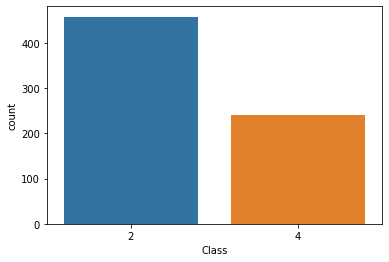

In [16]:
sns.countplot(df['Class']);

In [17]:
df['Class'].value_counts(2)

2    0.655222
4    0.344778
Name: Class, dtype: float64

Dentro del análisis realizado a la base de datos no se considera un problema de desbalanceo de clases dado que la clase positiva (cancer benigno) posee una proporción del 65.5% con respecto a la totalidad de la muestra, teniendo como clase negativa (cancer maligno) el 34.5%. Por ese motivo no es necesario realizar algún procedimiento para obtener un mejor balanceo de clases o corregir la distorsión de los datos entre las clases.

#### Analiza las implicaciones que conllevan los FN y FP

Sin duda la mayor implicación que posee el modelo es tener un FP (Falso Positivo) dado que, para el estudio, la clase mayoritaria es padecer cancer benigno (casos verdaderos positivos). No obstante, si se generan casos en los que los pacientes sometidos al estudio obtienen un resultado de no padercer cancer maligno, teniendo como origen las variables explicativas con resultados contrarios en cuanto al padecimiento de la enfermedad, harian que las personas con dicho padecimiento, dado que el análisis les indicó no padecer cancer maligno, no se someterían a los procedimientos quirúrgicos o tratamientos adecuados para frenar la enfermedad y, por ende, deteriorar su condición física por las consecuencias de dicha enfermedad.

#### Decide y justifica la métrica a utilizar

En este problema en específico, el costo de los FP suele ser mucho más alto que el de los FN, así que la métrica más adecuada es alguna que esté directamente correlacionada a la predicción de los casos Positivos. La métrica tradicional que se usa para evaluar las prediciones Positivas es la Precisión. La precisión se define como:

Precisión = ( TP / TP + FN )

Si bien, dentro de la información del esudio se determinó un Accuracy del 97,5%, seguramente se esperaría optimizarlo un poco mejor dado que, el costo es perjudicial para los interesados.

## Ejercicio 3: South German Credit Data Set
https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29  

#### a. Describe el problema y el objetivo que se busca
Esta base de datos contiene datos financieros y algunos datos generales de clientes, estos clientes han sido etiquedados de manera manuel como buenos o malos créditos. El objetivo con este data set es entrenar clasificadores que puedan ayudar a tomar una desición sobre el otorgamiento de un crédito.  

#### b. Justifica si el problema requiere técnicas de balanceo de clases
Para oder contestar esta pregunta necesitamos ver la proporción de clases.

In [ ]:
import pandas as pd
import requests, zipfile
from io import BytesIO

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00573/SouthGermanCredit.zip'
file_name = 'SouthGermanCredit.asc'
req = requests.get(path)
zp = zipfile.ZipFile(BytesIO(req.content))
zp.extractall()
dfEx2 = pd.read_csv(file_name, sep="\s+")
dfEx2.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
# La columna kredit es la que contiene las etiquetas, vamos a ver la proporción y decidir si el data set está desbalanceado
dfEx2['kredit'].value_counts()

1    700
0    300
Name: kredit, dtype: int64

El problema no es un problema de calses desbalanceado. El data set está en el límite, pero con una proporción de 70/30 no es necesario usar técnicas de desbalanceo.

#### c. Analiza las implicaciones que conllevan los FN y FP
La etiqueta *kredit* nos dice si el crédito fue bien otorgado o no.
- 0 Crédito mal otorgado
- 1 Crédito bien otorgado

En esto contexto los FN y FP se definirían como:
- FP créditos otorgados a malos clientes
- FN créditos negados a buenos clientes

Generalmente es mucho más costoso otorgar un crédito a un cliente que no lo pagará que negar un crédito a un cliente que lo podría pagar. Para poder hacer un análisis completo necesitaríamos tener los costes promedio de otorgar mal un crédito vs las utilidades que se dejan de generar por negarlo equivocadamente. Pero en general, en este tipo de escenarios es mucho más costoso los falsos positovos (*FP*) que los falsos negativos (*FN*).

#### d. Decide y justifica la métrica a utilizar
En este problema en específico, el costo de los *FP* suele ser mucho más alto que el de los *FN*, así que la métrica más adecuada es alguna que esté directamente correlacionada a la predicción de los casos *Positivos*. La métrica tradicional que se usa para evaular las prediciones *Positivas* es la *Precisión*. La precisión se define como:  
$$ Precisión = {TP \over TP+FP} $$  
Si tuvieramos más información sobre los costos de los *FP* vs *FN* podríamos proponer alguna otra métrica auxiliar que reflejara las consecuencias de los *FN*, pero sin más información la mejor métrica sería la *Precisión*

### Ejercicio 4:

####a.	Describe el problema y el objetivo que se busca.

- La base contiene 33 variables las cuales 10 variables se descartan, al ser una para el ID, Lat Long al contener ya la latitud y longitud, también Churn Label porque es el mismo valor de Churn, además se descarta Count, Country y State porque es el mismo para todos y esto no nos aporta para los análisis, también eliminando Churn Score, Cltv y Churn ya que son variables que están generando un comportamiento predictivo y no nos proporciona nada para el modelo. finalmente tenemos 32 variables de entrada y una variable de salida que será nuestra variable a predecir la cual nos indica. Hay un total de 7043 registros.

- Las variables están conformadas por tipos categóricas, binarias y tipo enteros y flotantes con temas relacionados a demografía, ubicación, población, servicios y estado. al realizar la selección de los datos importantes, no hay perdida de información.


-El problema se plantea como aprendizaje supervisado, donde se busca predecir la probabilidad que un cliente abandone la empresa.

- al predecir si un cliente tiene mayor probabilidad de abandono, significa plantearle nuevos servicios atractivos que hagan crecer la fidelidad y satisfacción del cliente. de lo contrario una disminución de las ventas por el abandono.   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

df = pd.read_excel('Telco_customer_churn.xlsx')
df = df.drop(
    ['CustomerID','Count', 'Country' , 'State' , 'Lat Long' ,'Churn Label' , 'Churn Score' ,'CLTV' ,'Churn Reason' ]
    ,axis = 1
)

df.isnull().values.any() ## No hay valores perdidos

False

####b.	¿Es un problema desbalanceado? ¿Cómo se podría enfrentar?



In [ ]:
print(df['Churn Value'].sum() / len(df) *100)
print(df['Churn Value'].sum() )

26.536987079369588
1869


Al realizar el análisis de la clase, vemos que la clase 1 contiene el 26.5% de las observaciones, la cual siguiendo las indicaciones de problemas de desbalanceo, La clase está por encima del 20% la cual podemos trabajar la base sin problemas de desbalanceo.

#### c. Analiza las implicaciones que conllevan los FN y FP

La etiqueta Churn Value nos dice si el cliente se retiró o abandono la empresa en el último trimestre:

0 : El cliente aun esta con la empresa

1 : El cliente abandono la empresa

para efectos del ejercicio, si un cliente tiene probabilidad de abandonar, se busca hacer campaña, donde se otorguen servicios y beneficios especiales a los clientes con el fin de incentivar la fidelidad y satisfacción del cliente, con el fin de hacer permanecer al cliente en la empresa.

En esto contexto los FN y FP se definirían como:

FP: otorgar beneficios a un cliente sin posibilidad de abandono
FN: No otorgar beneficios a un cliente con posibilidad de abandono

Dados los diferentes estudios, se demuestra que es más costos adquirir nuevos clientes que retener a los ya existentes. Por esta razón es muy importante realizar campañas de fidelización para mantener a los clientes felices.

Según el ejerció se da más importancia mantener al cliente, por esta razón un falso negativo implica no ejercer una campaña sobre un cliente con alta probabilidad de abandono, generado así su retiro y posteriormente a la disminución de ingresos. por esto es más costoso un FN que un FP.


####4.	Determinar el tipo de métrica de acuerdo a la Taxonomía de los autores.

para efectos del ejercicio y dado que la importancia de los FN, ademas las base no se encuentra desbalanceada, sin embargo la proporcion es baja, por tal motivo las dos metricas que se pueden acompañar para medir el desempeño seria en primer lugar F2-score [Precision y 2*Sensibilidad (Recall)] al cuial esta dada por la funcion:

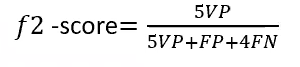



, y de segundo como soporte y tendiendo a la clase con menor peso, se utiliza la metrica de la curva PR: Presicion - Recall, con una mayor importancias a las prediciones positivas


## Ejercicio 5: Qualitative_Bankruptcy Data Set:
https://archive.ics.uci.edu/ml/datasets/Qualitative_Bankruptcy

#### a. Describe el problema y el objetivo que se busca
Se presenta un problema de clasificación con el uso de 6 parametros recobrados de un análisis de expertos para determinar el estrato donde clasificar un grupo particular de usuarios determinando si estan o no en bancarrota.

Los atributos son categóricos y tienen 3 posibles valores:
   P-Positivo
   A-Average (Promedio)
   N-Negativo
   
La clasificación final es binaria, con 2 posibles valores:
   B-Bankrupt
   NB-No Bankrupt

Entre los posibles usos de este dataset esta orientado principalmente a autorizaciones de herramientas financieras, como oportunidades de inversión, creditos, hipotecas, etc.


#### b. Justifica si el problema requiere técnicas de balanceo de clases

In [1]:
import pandas as pd
import seaborn as sns

path_5 = './Qualitative_Bankruptcy_DS.csv'
headers = ["IndustrialRisk","ManagementRisk","FinancialFlexibility","Credibility","Competitiveness","OperatingRisk","Class"]

df_5= pd.read_csv(path_5, names=headers, sep= ',')
df_5.drop(index=df_5.index[0], 
        axis=0, 
        inplace=True)
df_5.head()

,IndustrialRisk,ManagementRisk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk,Class
1,P,P,A,A,A,P,NB
2,N,N,A,A,A,N,NB
3,A,A,A,A,A,A,NB
4,P,P,P,P,P,P,NB
5,N,N,P,P,P,N,NB


In [2]:
df_5.shape

(250, 7)

In [3]:
df_5.dtypes

IndustrialRisk          object
ManagementRisk          object
FinancialFlexibility    object
Credibility             object
Competitiveness         object
OperatingRisk           object
Class                   object
dtype: object

In [4]:
df_5.describe()

,IndustrialRisk,ManagementRisk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [5]:
df_5.describe()

,IndustrialRisk,ManagementRisk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


Hacemos el tratamiento de los datos a valores numericos para el clasificador.
La etiqueta POSITIVO (P), PROMEDIO (A), NEGATIVO (N) cambian a [1,0,-1].

In [6]:
df_5Int = df_5

In [7]:
df_5Int = df_5Int.replace(
     to_replace=['P','A','N'], 
     value=[1, 0,-1])

La etiqueta de las clases tambien se cambian
Bankruptcy (B), Non-Bankruptcy (NB) cambian a [1,0]

In [8]:
df_5Int['Class'] = df_5Int['Class'].replace(
     to_replace=['NB','B'], 
     value=[0, 1])

In [9]:
df_5Int.head()

,IndustrialRisk,ManagementRisk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk,Class
1,1,1,0,0,0,1,0
2,-1,-1,0,0,0,-1,0
3,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0
5,-1,-1,1,1,1,-1,0


In [10]:
df_5Int.tail()

,IndustrialRisk,ManagementRisk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk,Class
246,-1,-1,0,-1,-1,-1,1
247,1,-1,-1,-1,-1,-1,1
248,0,-1,-1,-1,-1,-1,1
249,-1,-1,-1,-1,-1,-1,1
250,1,-1,-1,-1,0,0,1


In [12]:
df_5Int.describe()

,IndustrialRisk,ManagementRisk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk,Class
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.00000,250.000000
mean,-0.036000,-0.22800,-0.248000,-0.060000,-0.048000,-0.14000,0.428000
std,0.823051,0.82141,0.803166,0.831363,0.881364,0.86915,0.495781
min,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.00000,0.000000
25%,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.00000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,0.00000,0.000000,1.000000,1.000000,1.00000,1.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


In [13]:
df_5Int['Class'].value_counts()

0    143
1    107
Name: Class, dtype: int64

Dentro del análisis realizado encontramos un dataset sin problema de balanceo de clases dado que la clase positiva (en bancarrota) representa un 42.8% y la clase negativa (no en bancarrota) el 57.2%. Por ese motivo no es necesario realizar algun acondicionamiento del dataset para balancear clases.

#### Analiza las implicaciones que conllevan los FN y FP
Para este dataset es importante discrimintar los falsos negativos (FN) ya que si esta información es la entrada para autorizar algun tipo de herramienta financiera la perdida seria cuantiosa, en manera similiar a los ejercicios propuestos en clase, como el data set de tarjeta de credito, para las cuestiones financieras tiene mayor impacto los FN.
Por otra parte, los FP, simplemente se perderían algunos clientes pero el riesgo de perdidas es menor.

## Decide y justifica la métrica a utilizar
Para el uso de este dataset, el costo de los FN es más crítico por lo que la métrica más adecuada para calificar el modelo debe considerar el FN. 

La métrica recomendada que se usa para evaluar las prediciones Negativas es Recall. 

Recall = ( TP / TP + FN )

También para tener un balance, la metrica que podría considerarse es la función F1, definida como:

F1 = 2 * ((recall * precision)/(recall + precision))